In [1]:
def extract_data(file_path):
    # Lists to store extracted data
    data_cols = [[] for _ in range(4)]
    prey_data = []
    pred_data = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Split and strip to clean the data
            line = line.strip()
            if not line:
                continue
            if "prey{" in line and "pred{" in line:
                # Extracting the prey and pred data
                prey_part = line.split("prey{")[1].split("}")[0]
                pred_part = line.split("pred{")[1].split("}")[0]
                prey_data.append(prey_part)
                pred_data.append(pred_part)
            else:
                # Splitting and appending the column data
                values = line.split(", ")
                for i, val in enumerate(values):
                    data_cols[i].append(val)

    return data_cols, prey_data, pred_data

def save_to_file(data, filename):
    with open(filename, 'w') as file:
        file.write('\n\n'.join(data))

file_path = 'PopulationData.txt'  # Original file path
col_files = ['col1.txt', 'col2.txt', 'col3.txt', 'col4.txt']
prey_file = 'prey_data.txt'
pred_file = 'pred_data.txt'

data_cols, prey_data, pred_data = extract_data(file_path)

# Saving column data
for idx, filename in enumerate(col_files):
    save_to_file(data_cols[idx], filename)

# Saving prey and pred data
save_to_file(prey_data, prey_file)
save_to_file(pred_data, pred_file)

In [5]:
def remove_blank_lines(input_file, output_file):
    with open(input_file, 'r') as f:
        lines = f.readlines()

    # Filter out the blank lines
    cleaned_lines = [line for line in lines if line.strip() != ""]

    with open(output_file, 'w') as f:
        f.writelines(cleaned_lines)

# Example usage:
remove_blank_lines('col4.txt', 'col4.txt')

In [4]:
def read_single_column(file_path):
    with open(file_path, 'r') as file:
        return [line.strip() for line in file.readlines() if line.strip() != ""]

def split_into_columns(data, rows_per_column):
    columns = []
    for i in range(0, len(data), rows_per_column):
        columns.append(data[i:i + rows_per_column])
    return columns

def write_columns_to_file(columns, output_file):
    max_rows = max(len(col) for col in columns)
    
    with open(output_file, 'w') as file:
        for row in range(max_rows):
            row_data = []
            for col in columns:
                if row < len(col):
                    row_data.append(col[row])
                else:
                    row_data.append("")  # Empty string for columns with less data
            file.write(", ".join(row_data) + "\n")

input_file = 'PredatorPopulation.txt'  # Name of your input file
output_file = 'PredatorPopulation.txt'  # Where you want to save the output
rows_per_column = 1500

data = read_single_column(input_file)
columns = split_into_columns(data, rows_per_column)
write_columns_to_file(columns, output_file)



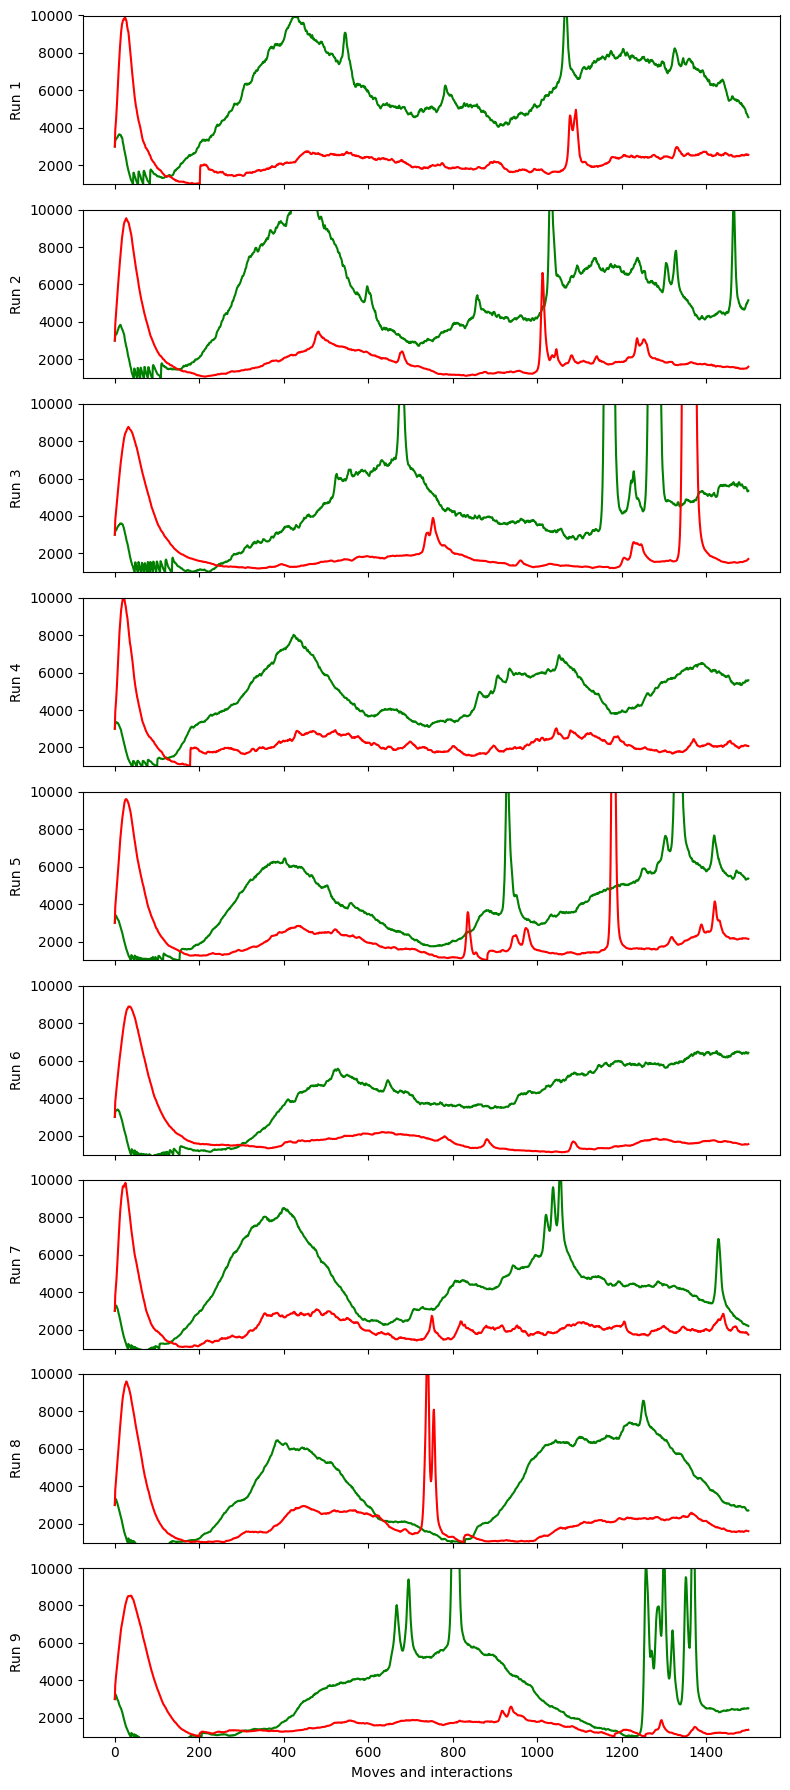

In [20]:
import matplotlib.pyplot as plt

def read_data_from_file(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f.readlines():
            # Split the data by comma and strip any whitespace
            data.append(list(map(float, line.strip().split(','))))
    # Transpose to get columns
    return list(map(list, zip(*data)))

def plot_columns_from_files(file1, file2):
    data1 = read_data_from_file(file1)
    data2 = read_data_from_file(file2)

    num_columns = min(len(data1), len(data2))
    fig, axes = plt.subplots(num_columns, 1, sharex=True, figsize=(8, 2*num_columns))

    for i in range(num_columns):
        if num_columns > 1:
            ax = axes[i]
        else:
            ax = axes  # If only one subplot, axes is not a list
        ax.plot(data1[i], c='green')
        ax.plot(data2[i], c='r')
        ax.set_ylabel(f'Run {i + 1}')
        # Making the y-axis shorter
        ax.set_ylim(990, 10000)

    plt.xlabel('Moves and interactions')
    plt.tight_layout()
    plt.show()
   

# Example usage
plot_columns_from_files('PreyPopulation.txt', 'PredatorPopulation.txt')
